In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset
insurance = pd.read_csv('Train_Data.csv')
insurance.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

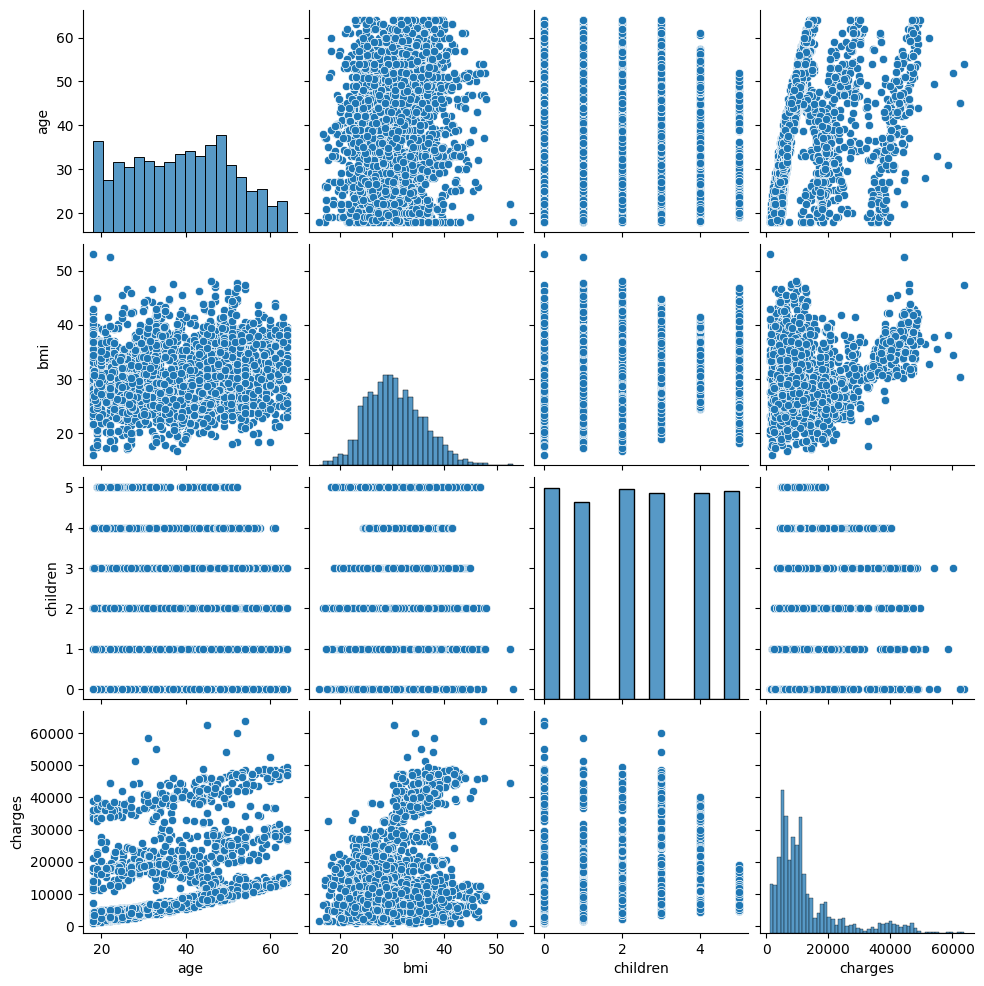

In [6]:
sns.pairplot(insurance)

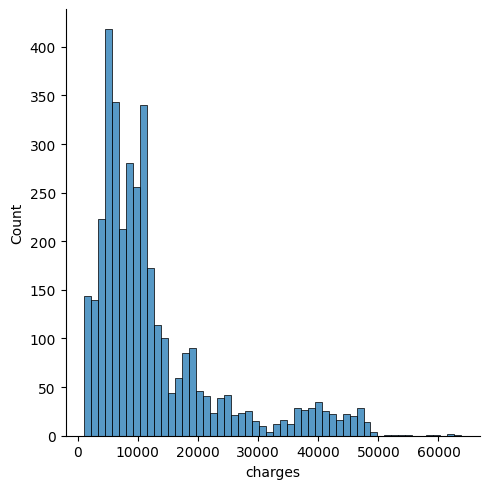

In [7]:
sns.displot(insurance['charges'])

In [8]:
sex_mapping = {'male': 1, 'female': 0}
smoker_mapping = {'yes': 1, 'no': 0}
region_mapping = {'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4}

insurance['region'] = insurance['region'].map(region_mapping)
insurance['sex'] = insurance['sex'].map(sex_mapping)
insurance['smoker']=insurance['smoker'].map(smoker_mapping)

<Axes: >

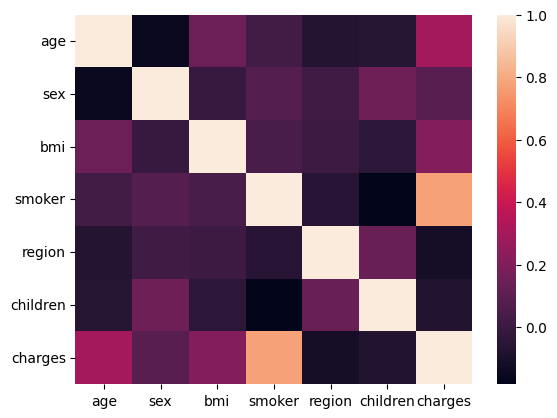

In [9]:
sns.heatmap(insurance.corr())

In [10]:
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = insurance['charges']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
# Creating the model
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [16]:
# print the intercept
print(lm.intercept_)

-8321.796993255784


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,235.260761
sex,1281.677975
bmi,262.676668
children,528.243755
smoker,23062.286506
region,-641.268689


## Prediction

In [18]:
predictions = lm.predict(X_test)

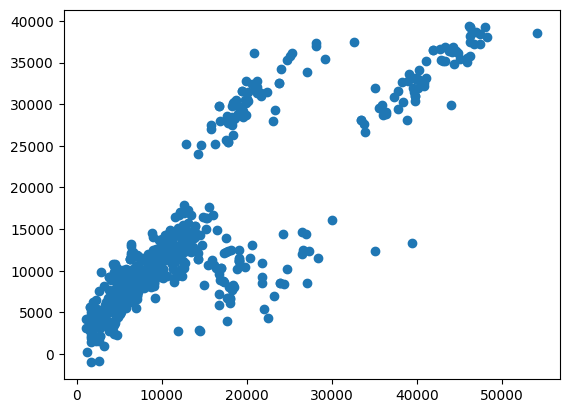

In [19]:
plt.scatter(y_test,predictions)

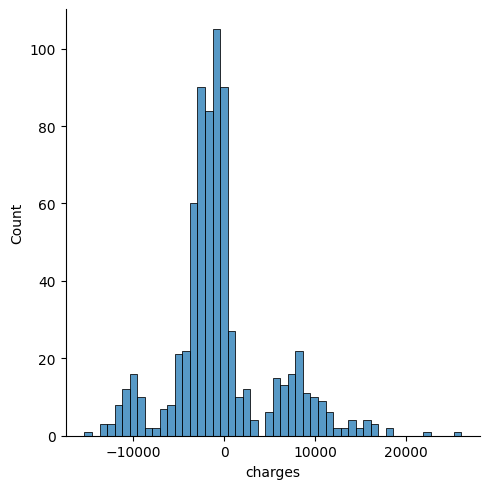

In [20]:
sns.displot((y_test-predictions),bins=50);

## Evaluation

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3899.790741738024
MSE: 30773597.165348284
RMSE: 5547.395529917466
